In [ ]:
#hide
#all_slow

In [ ]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila

# Steel Defect Detection

> Severstal Deep Learning segmentation case study.

In [ ]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from steel_segmentation.all import *
from fastai.vision.all import *

import torch
import torch.nn as nn
import torch.nn.functional as F
import segmentation_models_pytorch as smp

import warnings
import random
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive
from IPython.display import Image

In [ ]:
seed_everything()

Upload a steel image here:

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(256,1600))
out_pl

Output()

In [ ]:
def opt_func(params, **kwargs): return OptimWrapper(params, torch.optim.Adam, **kwargs)
def splitter(m): return convert_params([[m.encoder], [m.decoder], [m.segmentation_head]])

In [ ]:
learner = load_learner(models_dir/"exports"/"efficientnet-b2.pkl")

In [ ]:
rles, preds, probs = learner.predict(img)

In [ ]:
defects = list(preds.float().argmax(0).unique().numpy())[1:]
n = len(defects)
defects_word = "defects" if n!=1 else "defect"
types_word = "types" if n!=1 else "type"
if n > 0:
    title = f"Predicted n°{n} {defects_word} of {types_word}: {' '.join([str(o) for o in defects])}"
else:
    title = f"Predicted n°0 {defects_word}"

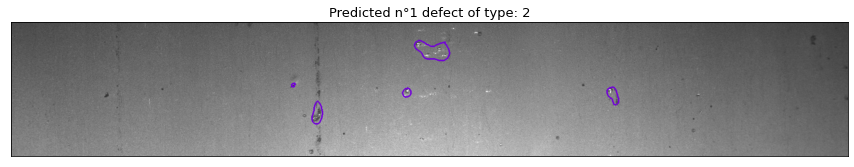

In [ ]:
plot_mask_image(title, np.array(img), preds.permute(1,2,0).float().numpy())